# House Prices in Monroe Twp, NJ (USA)

**Problem Statement:** Given above data build a machine learning model that can predict home prices based on square feet area

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("homePrices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


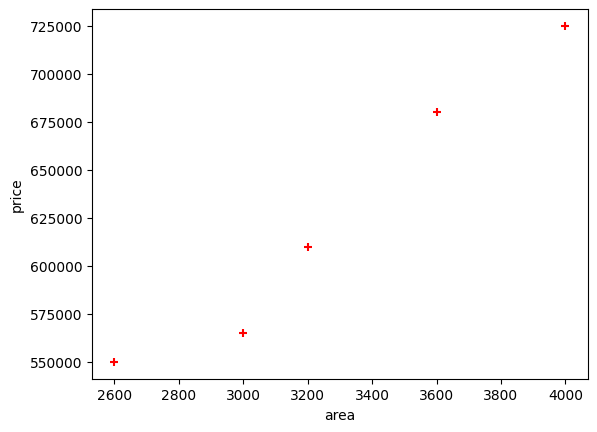

In [4]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

price column is dropped in the new data frame, why?

In [5]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


cz the object of 'linear_model' -> fit of this model expects a 2d array(object) 

model is an object of the class linearReg

In [6]:
# Create linear regression object
model = linear_model.LinearRegression()
model

LinearRegression()

In [7]:
model.fit(new_df, df.price)

LinearRegression()

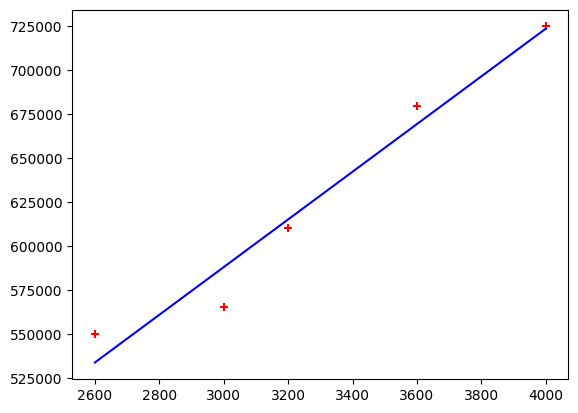

In [8]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, model.predict(new_df), color='blue')

(1) Predict price of a home with area = 3300 sqr ft

In [9]:
model.predict([[3300]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

(2) Predict price of a home with area = 5000 sqr ft

In [10]:
model.predict([[5000]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [11]:
print(model.coef_)
print(model.intercept_)

[135.78767123]
180616.43835616432


Generate CSV file with list of home price predictions

In [12]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
y_pred = model.predict(area_df)

In [14]:
area_df["prices"] = y_pred
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
area_df.to_csv("predictedPrices.csv")

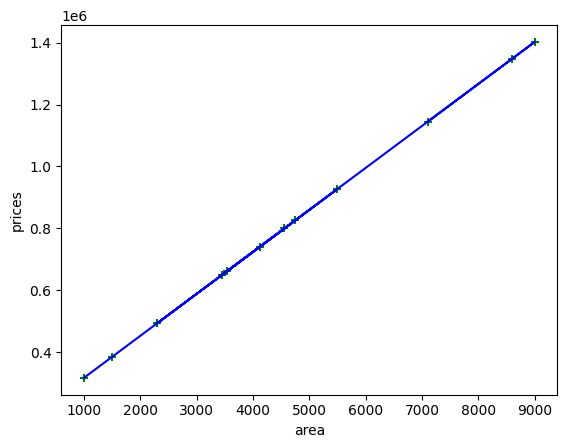

In [16]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(area_df.area, area_df.prices, color='green', marker='+')
plt.plot(area_df.area, y_pred, color='blue')